# <center>Customer Segmentation Analysis: K-Means, DBSCAN, and MeanShift Comparison</center>

## Objective

- Analyzed customer behavior in a mall dataset using multiple Unsupervised clustering techniques.
- Revealed distinct customer segments, enabling targeted marketing strategies for an enhanced shopping experience.

Since our aim is to categorise or cluster the customers, we will use clustering methods available in sklearn, namely K Means Clustering, Density-Based Spatial Clustering of Applications with Noise (DBSCAN) and MeanShift Comparison.

## 1. Importing Necessary Libraries:

In [1]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## 2. Loading and Pre-processing Dataset

### Loading Dataset:

In [2]:
# Loading mall dataset

data = pd.read_csv("Mall_Customers.csv")

In [3]:
# Take a glance of dataset:
data.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


### Description of Dataset:

- **CustomerID:** Unique ID assigned to the customer
- **Gender:** Gender of the customer
- **Age:** Age of the customer
- **Annual Income:** Annual Income of the customer
- **Spending Score:** Score assigned by the mall based on customer behavior and spending nature

In [4]:
# Checking shape of dataset:
print(f"Shape of dataset is: {data.shape}")

Shape of dataset is: (200, 5)


### EDA of Dataset:

In [5]:
# checking dupliacted rows:

print(f"Number of duplicated rows: {data.duplicated().sum()}")

Number of duplicated rows: 0


In [6]:
# CHceking for NULL values:

print(f" NUll value informations:")
data.isna().sum()

 NUll value informations:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# check datset informations:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# check descriptive statistics:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Pre-processing of Dataset

In [9]:
# Renaming columns
data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)

data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=200)

Droping "CustomerID" column:

In [11]:
data = data.drop('CustomerID', axis=1)

In [12]:
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 3. Data Visualization

```See different-different kinds of plots -- to get different kinds of informations.```

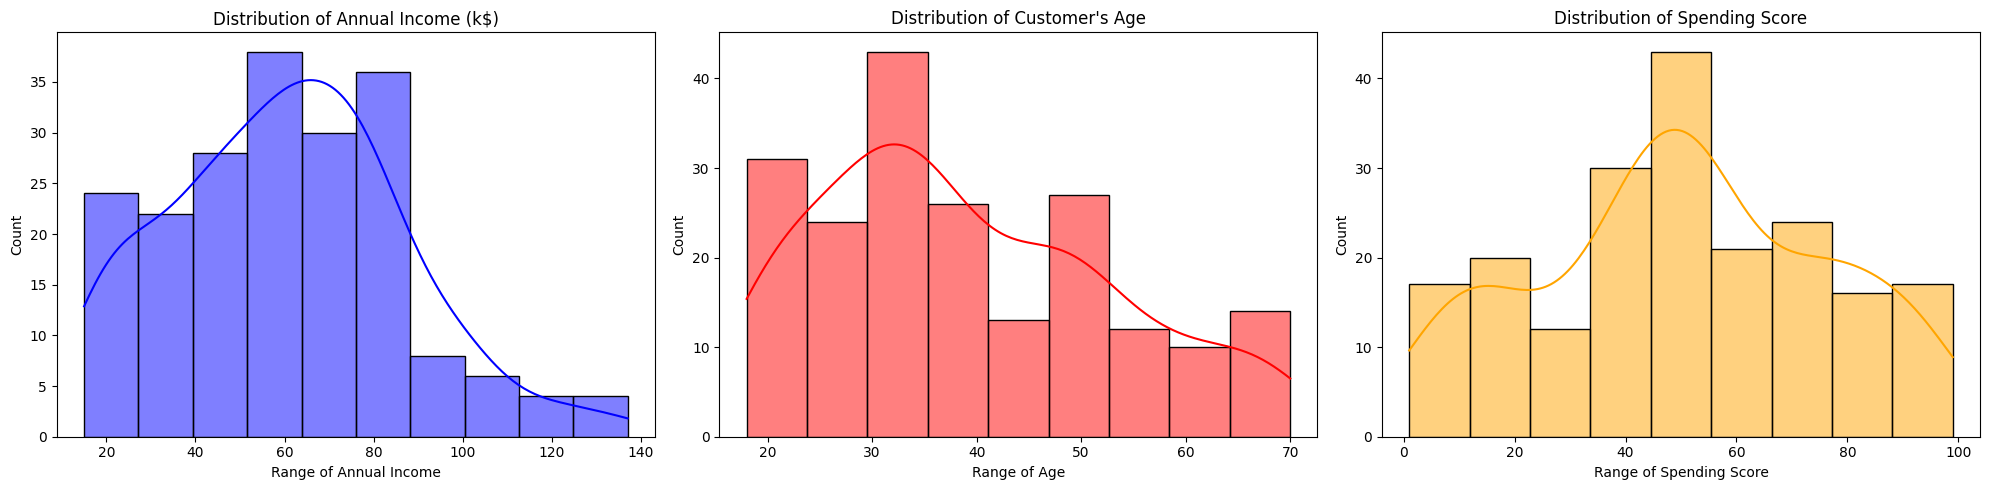

In [13]:

# Set the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# Create subplots
fig, axes = plt.subplots(1, 3)

# Distribution plot for annual income
sns.histplot(data['Income'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Annual Income (k$)')
axes[0].set_xlabel('Range of Annual Income')
axes[0].set_ylabel('Count')

# Distribution plot for customer's age
sns.histplot(data['Age'], kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribution of Customer\'s Age')
axes[1].set_xlabel('Range of Age')
axes[1].set_ylabel('Count')

# Distribution plot for spending score
sns.histplot(data['Score'], kde=True, ax=axes[2], color='orange')
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Range of Spending Score')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


Here, we can takea view of number of customers w.r.to different factors.

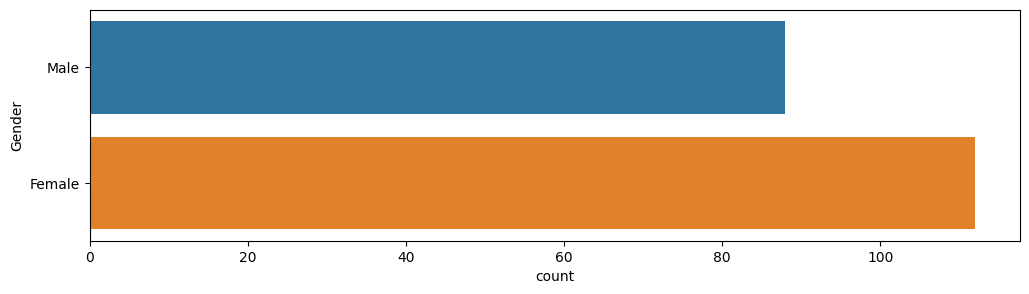

In [14]:
# Visualization on number of customer based on gender

plt.figure(1 , figsize = (12 , 3))
sns.countplot(y = 'Gender' , data = data, color="lightcoral", palette="tab10")
plt.show()

From above plot, we can analyze the ratio of male and female in the dataset.

**Peoples of age between 25 to 40 are mostly visiting mall than other age groups.**

Text(0.5, 1.0, 'Spending Score Comparison Based on Gender')

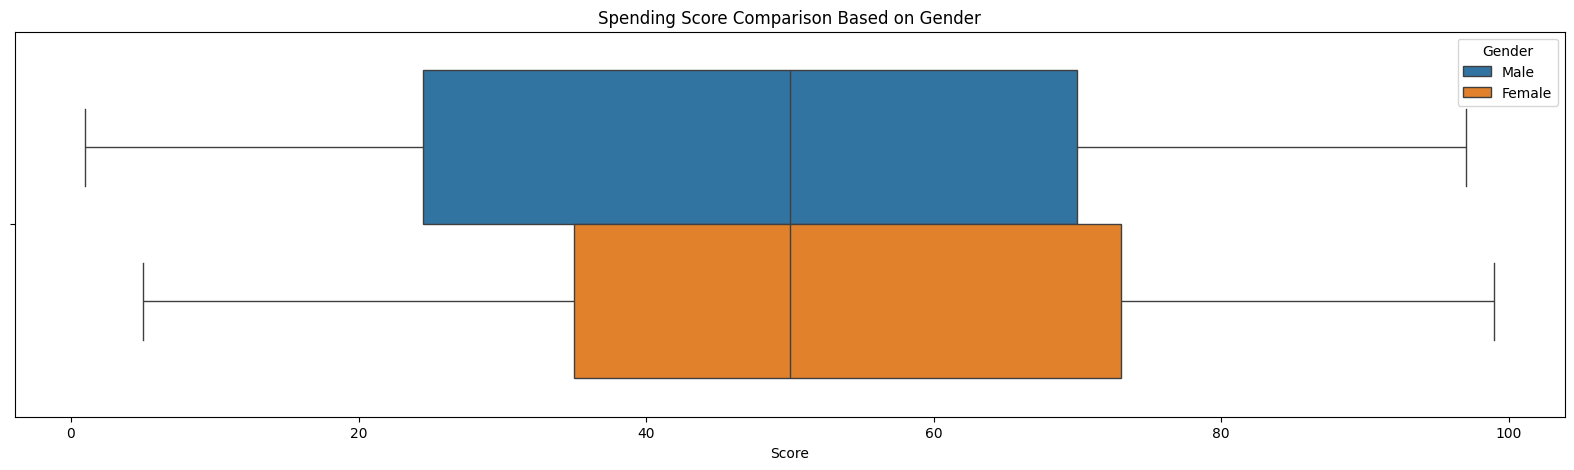

In [15]:
# Spending score comparison based on gender
sns.boxplot(data= data, x = "Score", hue="Gender")
plt.title('Spending Score Comparison Based on Gender')

This diagram shows the average spending score of female and male. We can observe that the average spending score of female is same as male, they have higher spending score than male, and their least spending core is greater than male's.

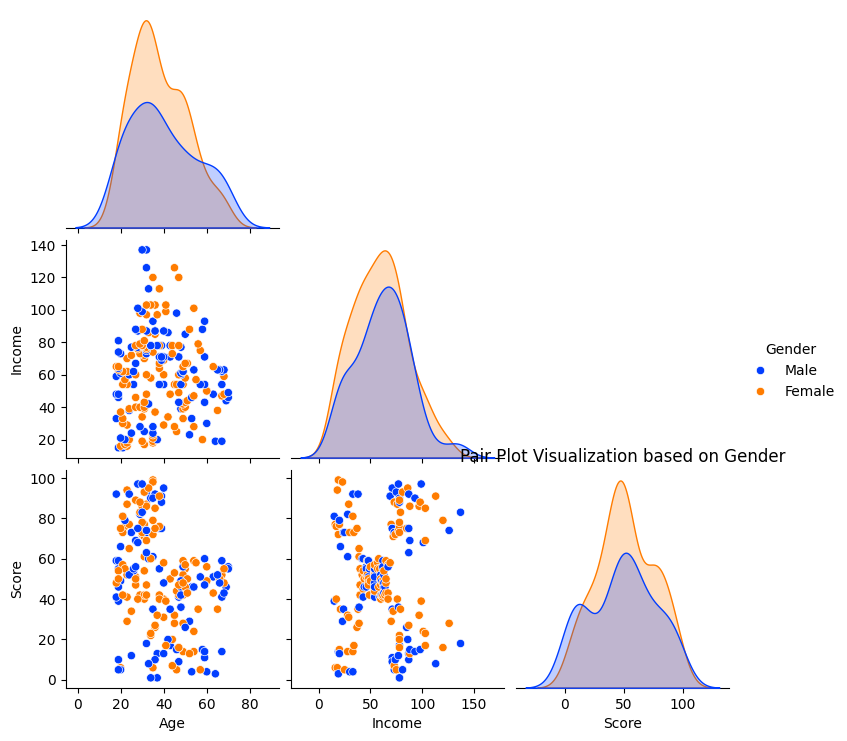

In [16]:
# Analyze pairplot:

sns.pairplot(data = data, hue = 'Gender', corner = True, palette = 'bright')
plt.title('Pair Plot Visualization based on Gender')
plt.show();

```As shown in the plot above. There is no significant difference between male and female customers. So in the following, we try to cluster based on age, annual income, and spending score.```

Checkout Remaining 3 Features:

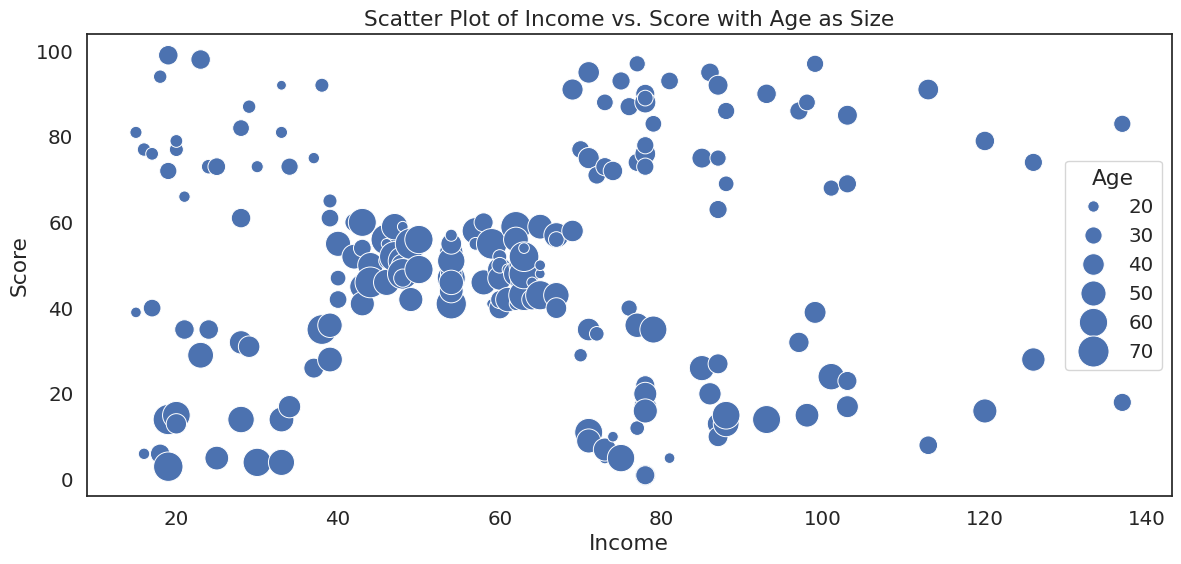

In [17]:
plt.figure(figsize=(14, 6))
sns.set(style="white", font_scale=1.3)

sns.scatterplot(data=data, 
                x='Income', 
                y='Score', 
                size='Age', 
                sizes=(50, 500)
               )

plt.title('Scatter Plot of Income vs. Score with Age as Size')
plt.show()

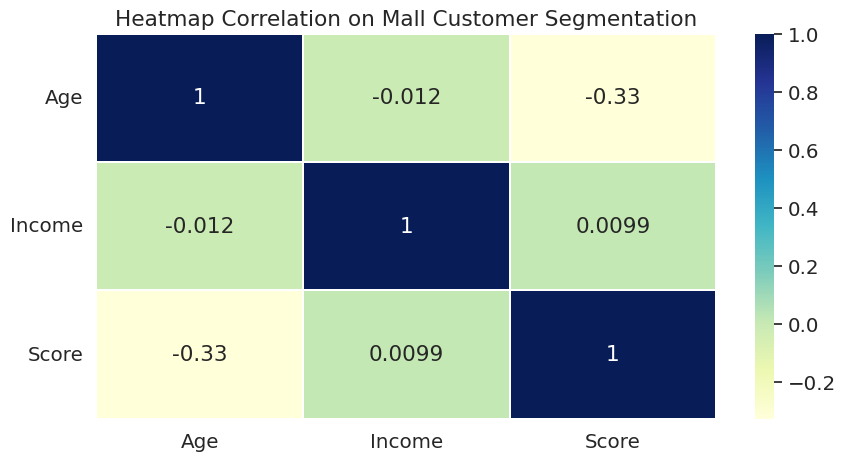

In [18]:
# Heatmap correlation

plt.figure(figsize=(10,5))
sns.heatmap(data.iloc[:, 1:].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.title('Heatmap Correlation on Mall Customer Segmentation')
plt.show();

## 4. Scaling

Drop "Gender" column:

In [19]:
X = data.drop("Gender", axis = 1) # 3 feature selected: age, annual income, and spending score.

In [20]:
X.sample(3)

,Age,Income,Score
183,29,98,88
150,43,78,17
61,19,46,55


Apply Normalization -- StandardScaler Technique:

In [21]:
# Initialize the scaling object
std_scaler = StandardScaler()

# Fit and Transform:
X_scaled = std_scaler.fit_transform(X)

# check final shape
print(f"Shape of X_scaled:{X_scaled.shape}")

Shape of X_scaled:(200, 3)


In [22]:
print(f"After scaling INput becomes:")
X_scaled[:3]

After scaling INput becomes:


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298]])

## 5. Matrix for measuring model score

### Silhoutte Score / Silhoutte Coefficient

```What is Silhouette Coefficient?```

The form of the silhouette score (Rousseeuw 1987) for a single point can be seen in below figure. 

In essence, it’s a normalised difference in distance, capturing how close a point is to other points in its own cluster compared to points in the next nearest cluster.

![Silhoutte_Score](https://uploads-ssl.webflow.com/5f5148a709e16c7d368ea080/5f7dea907b8e8c7769e769c8_5f7c9650bc3b1ed0ad2247eb_silhouette_formula.jpg)

## 6. Creating Models

1. K-Means
2. DBSCAN
3. Mean-ShiftClustering

## 6.1 K-Means Clustering

```For K-Means Clustering Algorithm, we have to determine the K value that represents the number of clusters.``` 

```To find the optimal K value, I use Elbow Method to determine it.```

In [23]:
# store sse (sum of square of error) and silhoutte score
kmeans_sse = []
kmeans_silhouette = []

# Range of clusters to test
for k in range(2, 13):
    k_means = KMeans(n_clusters=k, init='k-means++', n_init=15, max_iter=100, random_state=1).fit(X_scaled)
    
    # Append SSE (inertia) and silhouette score to lists
    kmeans_sse.append(k_means.inertia_)
    kmeans_silhouette.append(silhouette_score(X_scaled, k_means.labels_))

# Create a DataFrame to store the results
results_df_k_means = pd.DataFrame({
    'Number of Clusters (k)': list(range(2, 13)),
    'SSE (Inertia)': kmeans_sse,
    'Silhouette Score': kmeans_silhouette
})

In [24]:
# see results of k-means for different values of "k"
results_df_k_means

,Number of Clusters (k),SSE (Inertia),Silhouette Score
0,2,389.386189,0.335472
1,3,295.212246,0.357793
2,4,205.225147,0.403958
3,5,168.247580,0.416643
4,6,133.868334,0.427428
5,7,117.011555,0.417232
6,8,103.846238,0.409884
7,9,92.860670,0.418808
8,10,81.765318,0.403519
9,11,72.263360,0.409296


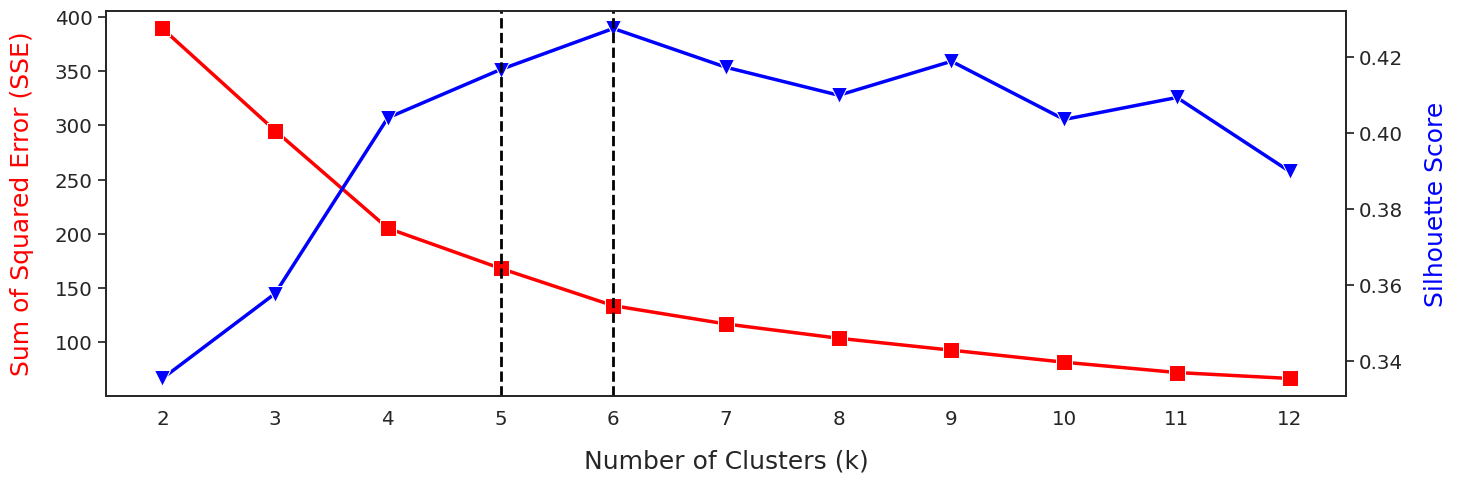

In [25]:
# Plotting the above obtained result:

fig, ax1 = plt.subplots(figsize=(16, 5))

# Plot SSE (Inertia)
sns.lineplot(x='Number of Clusters (k)', y='SSE (Inertia)', data=results_df_k_means, marker='s', markersize=12, 
             linewidth=2.5, color='red', ax=ax1)
ax1.set_xlabel("Number of Clusters (k)", fontsize=18, labelpad=15)
ax1.set_ylabel("Sum of Squared Error (SSE)", color='red', fontsize=18, labelpad=15)
ax1.grid(False)

# Create a second y-axis for Silhouette Score
ax2 = ax1.twinx()
sns.lineplot(x='Number of Clusters (k)', y='Silhouette Score', data=results_df_k_means, marker='v', markersize=12, 
             linewidth=2.5, color='blue', ax=ax2)
ax2.set_ylabel("Silhouette Score", color='blue', fontsize=18, labelpad=15)
ax2.grid(False)

# Add a vertical line at a specific point (e.g., 6 clusters here)
ax2.axvline(x=6, linestyle='--', lw=2, color='black')
ax2.axvline(x=5, linestyle='--', lw=2, color='black')

# Set x-axis ticks
plt.xticks(results_df_k_means['Number of Clusters (k)'])

plt.show()


**In K-Means algorithm, K is selected equal to 6:**
* In K=6, the Silhouette score has the highset score.
* In K=6, according to the elbow method, there is an elbow.

```or, We can take K =  5```

In [26]:
# Number of clusters to use
num_clusters = 5

# Fit KMeans with the desired number of clusters
k_means_6 = KMeans(n_clusters=num_clusters, init='k-means++', n_init=15, max_iter=100, random_state=0).fit_predict(X_scaled)

# Assuming data is your original DataFrame
customer_kmeans = data.copy()
customer_kmeans['K-Means Label'] = k_means_6
customer_kmeans.head()

,Gender,Age,Income,Score,K-Means Label
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,4


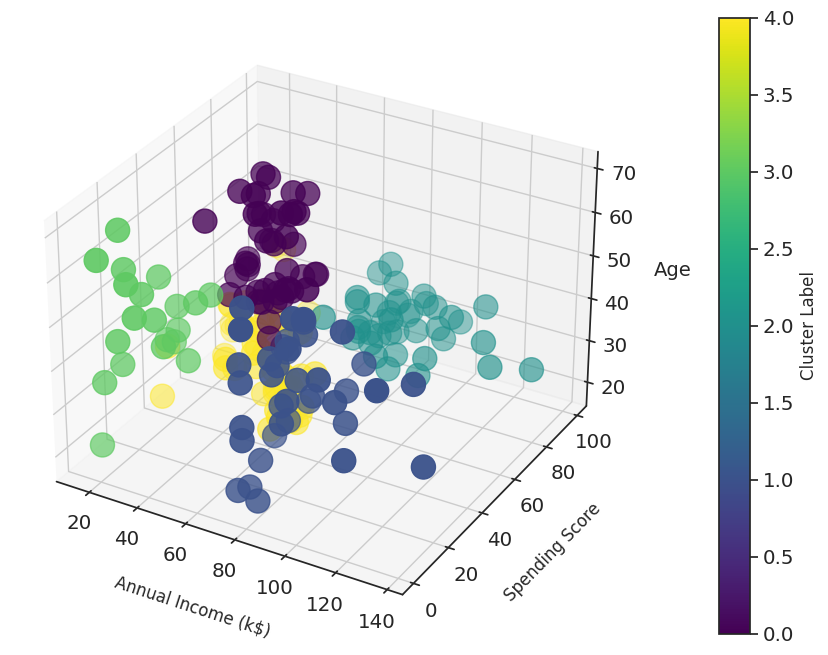

In [27]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 6 clusters
scatter = ax.scatter(customer_kmeans['Income'], 
                     customer_kmeans['Score'], 
                     customer_kmeans['Age'], 
                     s=300, c=k_means_6.astype(float), cmap='viridis')

ax.set_xlabel('Annual Income (k$)', fontsize=12, labelpad=15)
ax.set_ylabel('Spending Score', fontsize=12, labelpad=15)
ax.set_zlabel('Age', fontsize=14, labelpad=15)

# Add color bar
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster Label', fontsize=12)

plt.show()

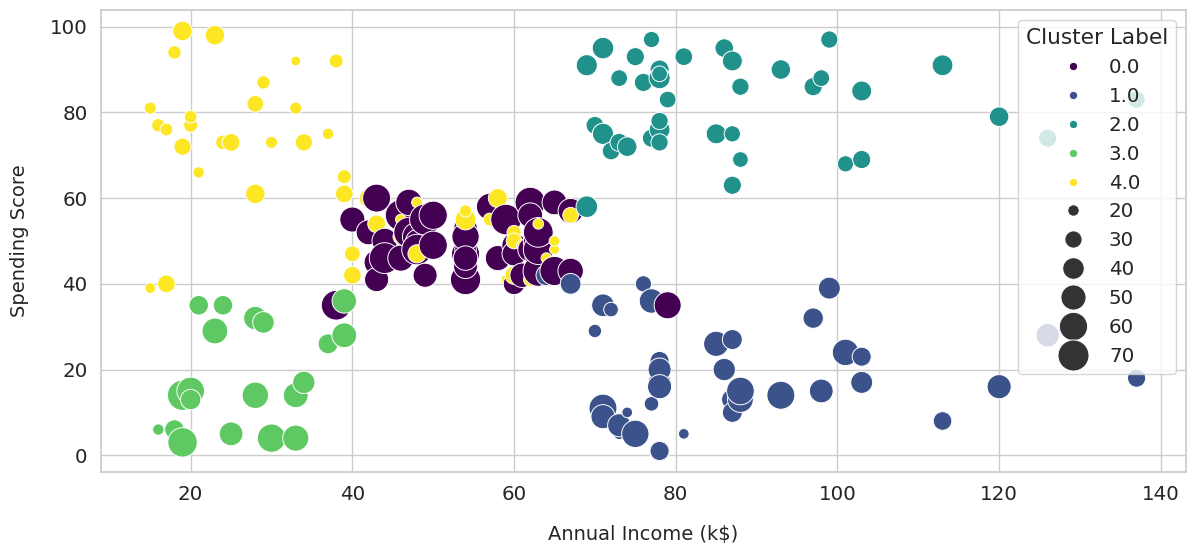

In [28]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", font_scale=1.3)

# Use k_means_6 instead of k_means_5
sns.scatterplot(data=customer_kmeans, x='Income', y='Score',
                hue=k_means_6.astype(float), palette='viridis', size='Age',
                sizes=(50, 500))

plt.xlabel('Annual Income (k$)', fontsize=14, labelpad=15)
plt.ylabel('Spending Score', fontsize=14, labelpad=15)

# Add a legend
plt.legend(title='Cluster Label')

plt.show()


Silhoutte Score:

In [29]:
customer_kmeans.columns

Index(['Gender', 'Age', 'Income', 'Score', 'K-Means Label'], dtype='object')

In [30]:
# Silhouette Coefficient of K-Means Model

kmeans_silhoutte_score = round(silhouette_score(customer_kmeans.iloc[:, 1:], customer_kmeans['K-Means Label']), 2)
print(f"Silhoutte score of k-means algo: {kmeans_silhoutte_score}")

Silhoutte score of k-means algo: 0.42


## 6.2 DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.

![DBSCAN-Algo-Diagram](https://beginningwithml.files.wordpress.com/2019/04/5aikc.png?w=456&h=329)

**For DBSCAN Clustering:**
* we have to determine the value of minimum points/samples and Epsilon. 
* Minimum points is the fewest number of points required to form a cluster, while epsilon is the maximum distance two points can be from one another while still belonging to the same cluster.

**Determining MIn-points and Samples**

In [31]:

# store info about silhoutte score and number of clusters:
dbscan_silhouette = []
dbscan_ncluster = []

eps_range = np.arange(0.4, 1, 0.1)
min_sample_range = range(3, 10)

for eps_value in eps_range:
    silhouette_row = []
    ncluster_row = []
    
    for min_samples_value in min_sample_range:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, n_jobs=-1).fit(X_scaled)
        silhouette = silhouette_score(X_scaled, dbscan.labels_)
        
        silhouette_row.append(silhouette)
        ncluster_row.append(len(np.unique(dbscan.labels_)))

    dbscan_silhouette.append(silhouette_row)
    dbscan_ncluster.append(ncluster_row)

# Create DataFrames
dbscan_silhouette_df = pd.DataFrame(dbscan_silhouette, 
                                    columns=list(min_sample_range),
                                    index=list(eps_range))

dbscan_ncluster_df = pd.DataFrame(dbscan_ncluster, 
                                  columns=list(min_sample_range),
                                  index=list(eps_range))


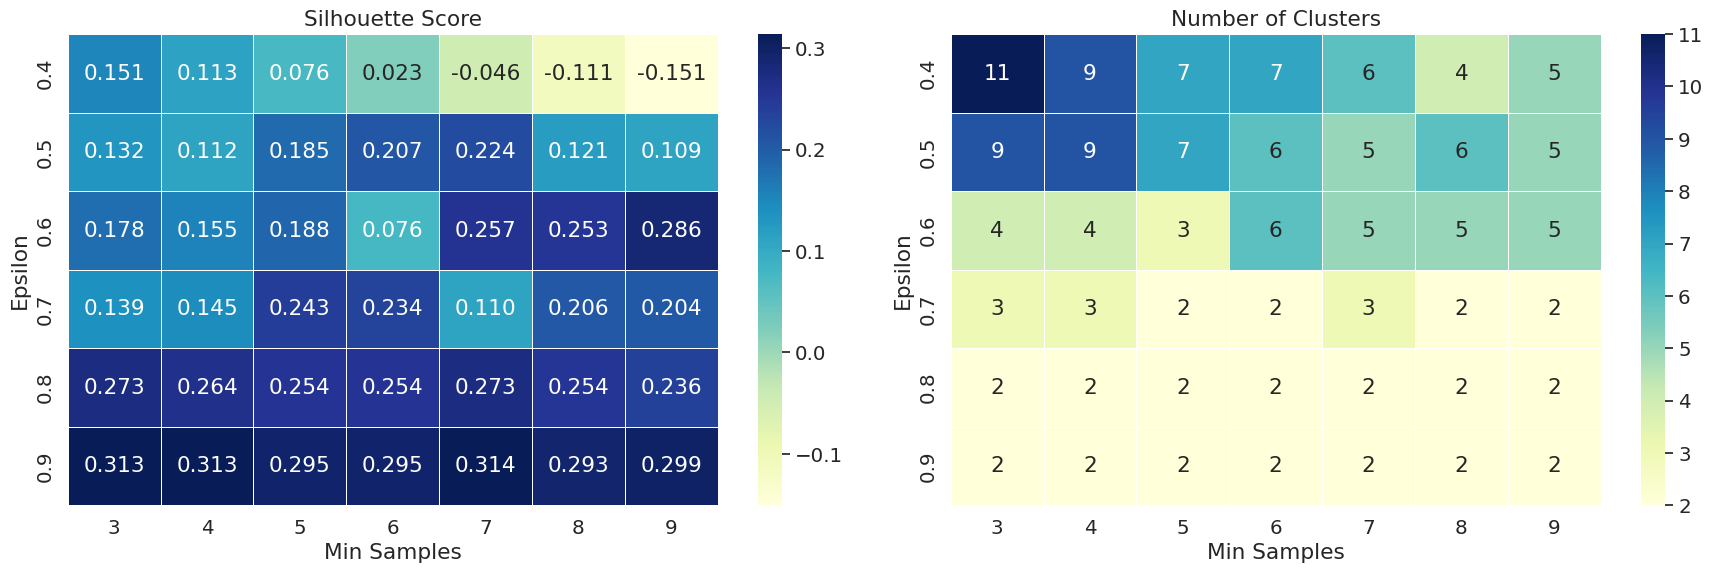

In [32]:
# plotting the above results:

plt.figure(figsize=(18, 6))

# Silhouette Score Heatmap
plt.subplot(1, 2, 1)
silhouette_heatmap = sns.heatmap(dbscan_silhouette_df, annot=True, linewidths=0.5,
                                  cmap="YlGnBu", yticklabels=dbscan_silhouette_df.index.values.round(2),
                                  fmt='0.3f')
silhouette_heatmap.set_xlabel("Min Samples")
silhouette_heatmap.set_ylabel('Epsilon')
plt.title("Silhouette Score")

# Number of Clusters Heatmap
plt.subplot(1, 2, 2)
cluster_heatmap = sns.heatmap(dbscan_ncluster_df, annot=True, linewidths=0.5,
                               cmap="YlGnBu", yticklabels=dbscan_ncluster_df.index.values.round(2))
cluster_heatmap.set_xlabel("Min Samples")
cluster_heatmap.set_ylabel('Epsilon')
plt.title("Number of Clusters")

plt.tight_layout()
plt.show()


I**n DBSCAN algorithm, eps = 0.6 & min_samples = 7. Because:**

- With this parameters, the DBSCAN algorithm has a rather high Silhouette score.
- The performance of dbscan is based on the density of points. In this dataset, the points are low density. Therefore, try not to make the eps and min samples too large.
- It should also be noted that the number of optimal clusters is more than two.

In [33]:
# Apply DBSCAN with above parameters
dbscan_result = DBSCAN(eps=0.6, min_samples=7, n_jobs=-1).fit_predict(X_scaled)

#saving results in a dataframe:
customer_dbscan = data.copy()
customer_dbscan['DBSCAN Label'] = dbscan_result
customer_dbscan.head()


,Gender,Age,Income,Score,DBSCAN Label
0,Male,19,15,39,-1
1,Male,21,15,81,0
2,Female,20,16,6,-1
3,Female,23,16,77,0
4,Female,31,17,40,-1


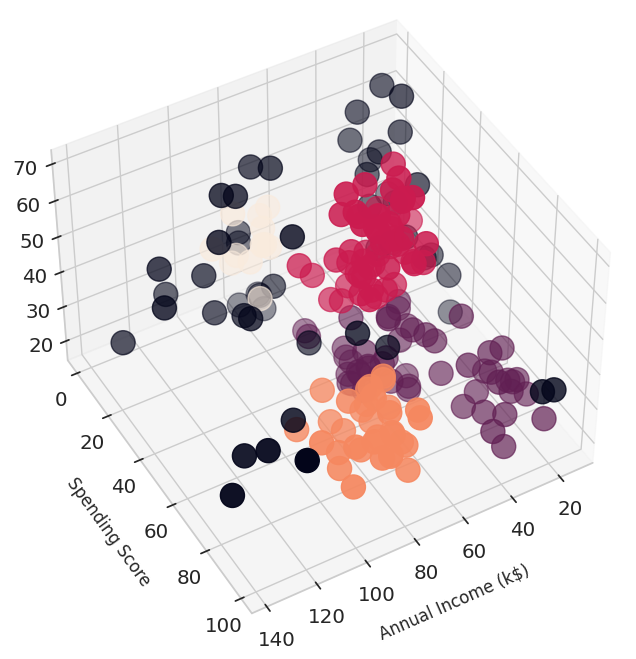

In [34]:
#plotting dataset after applyig DBSCAN:

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with DBSCAN labels
ax.scatter(customer_dbscan['Income'], 
           customer_dbscan['Score'], 
           customer_dbscan['Age'], 
           s=300, c=dbscan_result.astype(float))

ax.set_xlabel('Annual Income (k$)', fontsize=12, labelpad=12)
ax.set_ylabel('Spending Score', fontsize=12, labelpad=12)
ax.set_zlabel('Age', fontsize=12, labelpad=12)

# Set the elevation and azimuth angles
ax.view_init(elev=45, azim=60)

plt.show()


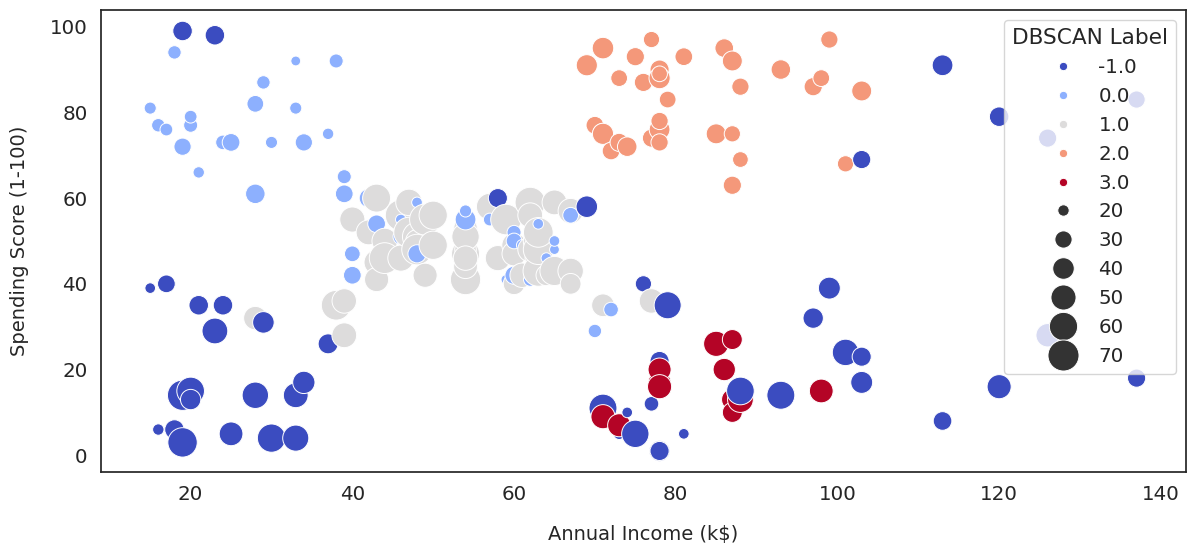

In [35]:
#plottig in 2D:

plt.figure(figsize=(14, 6))
sns.set(style="white", font_scale=1.3)

# Use dbscan_result instead of dbscan_5
sns.scatterplot(data=customer_dbscan, x='Income', y='Score',
                hue=dbscan_result.astype(float), palette='coolwarm', size='Age',
                sizes=(50, 500))

plt.xlabel('Annual Income (k$)', fontsize=14, labelpad=15)
plt.ylabel('Spending Score (1-100)', fontsize=14, labelpad=15)

# Add a legend
plt.legend(title='DBSCAN Label')

plt.show()


In [36]:
customer_dbscan.columns

Index(['Gender', 'Age', 'Income', 'Score', 'DBSCAN Label'], dtype='object')

In [37]:
print(customer_dbscan['DBSCAN Label'].value_counts())
customer_dbscan_mean = customer_dbscan.iloc[:, 1:].groupby(by = 'DBSCAN Label').mean()
customer_dbscan_mean

DBSCAN Label
 1    53
 0    51
-1    50
 2    34
 3    12
Name: count, dtype: int64


,Age,Income,Score
DBSCAN Label,,,
-1,40.260000,64.980000,28.840000
0,24.588235,43.705882,60.549020
1,54.113208,54.000000,47.358491
2,32.588235,81.647059,82.558824
3,43.916667,83.000000,16.083333


**Based on the DBSCAN algorithm:**
- ```4 clusteres were identified (and 50 outliers!)```

- It turned out that ```this algorithm did not perform well``` in clustering. 
- This could have been predicted before writing the code. Few samples were available and ``the relative density was low``.

## 6.3 Mean-Shift Clustering:

It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

```Selecting optimal Bandwidth(radius) value using estimate_bandwidth() funtion```

In Mean Shift Clustering, we need to determine a bandwidth value. The bandwidth is the distance/size scale of the kernel function, i.e. what the size of the “window” is across which you calculate the mean. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

Unlike the popular K-Means cluster algorithm, mean-shift does not require specifying the number of clusters in advance. The number of clusters is determined by the algorithm with respect to the data.

In [38]:
# Create Mean Shift Object

from sklearn.cluster import MeanShift, estimate_bandwidth

**quantile : float, default=0.38**
- The quantile parameter controls the proportion of data to use for bandwidth estimation.
- Should be between [0, 1] 0.5 means that the median of all pairwise distances is used.

In [39]:
# Estimate bandwidth for the given datatset:

bandwidth = estimate_bandwidth(X_scaled, quantile=0.15, n_jobs=-1)

print(f"Estimated Bandwidth: {bandwidth:.3f}")

Estimated Bandwidth: 1.263


In [40]:
# finding best bandwidth manually:

mshift_silhouette = []
mshift_ncluster = []

bandwidth_range = np.arange(0.9, 1.4, 0.1)

for bandwidth_value in bandwidth_range:
    mshift = MeanShift(bandwidth=bandwidth_value, n_jobs=-1).fit(X_scaled)
    
    silhouette = silhouette_score(X_scaled, mshift.labels_)
    n_clusters = len(np.unique(mshift.labels_))
    
    mshift_silhouette.append(silhouette)
    mshift_ncluster.append(n_clusters)



In [41]:
# Convert the lists to NumPy arrays
mshift_silhouette = np.asarray(mshift_silhouette).reshape(-1, 1)
mshift_ncluster = np.asarray(mshift_ncluster).reshape(-1, 1)

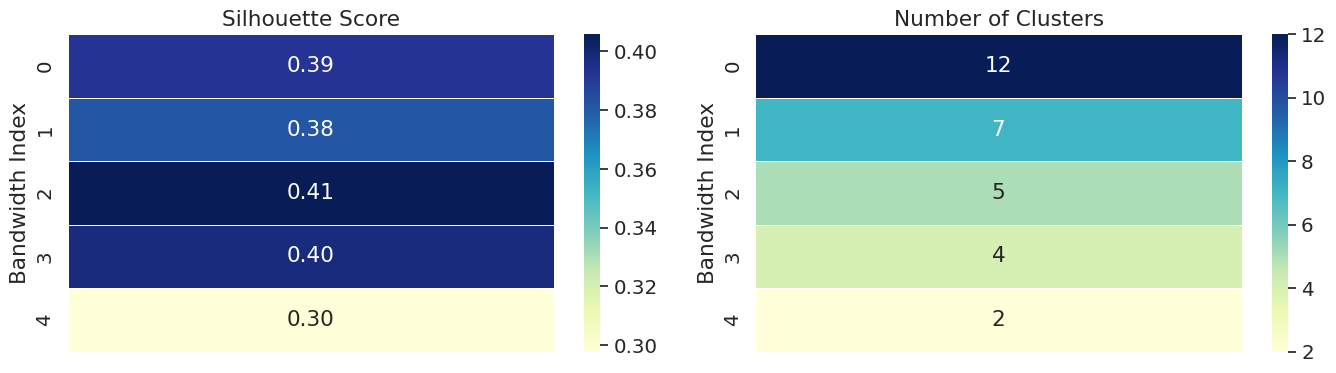

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

# Silhouette Score Heatmap
plt.subplot(1, 2, 1)
silhouette_heatmap = sns.heatmap(mshift_silhouette, annot=True, linewidths=0.5,
                                 cmap="YlGnBu",
                                 fmt='0.2f')
silhouette_heatmap.set(xticklabels=[])
silhouette_heatmap.set_ylabel("Bandwidth Index")
plt.title("Silhouette Score")

# Number of Clusters Heatmap
plt.subplot(1, 2, 2)
cluster_heatmap = sns.heatmap(mshift_ncluster, annot=True, linewidths=0.5,
                              cmap="YlGnBu")
cluster_heatmap.set(xticklabels=[])
cluster_heatmap.set_ylabel("Bandwidth Index")
plt.title("Number of Clusters")

plt.tight_layout()
plt.show()


**In Meanshift algorithm, bandwidth is selected equal to 1.1. Because:**
- ```In bandwidth=1.1, the Silhouette score has the highset score.```

Fitting the mean-shift cluster model:

In [43]:
mshift_result = MeanShift(bandwidth=1.1, n_jobs=-1).fit_predict(X_scaled)

In [44]:
# Saving mshift_result in a dataframe:

customer_mshift = data.copy()
customer_mshift['MeanShift Label'] = mshift_result
customer_mshift.head()


,Gender,Age,Income,Score,MeanShift Label
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,4


In [45]:
print(f"Total number of clusters is: {len(np.unique(mshift_result))}")

Total number of clusters is: 5


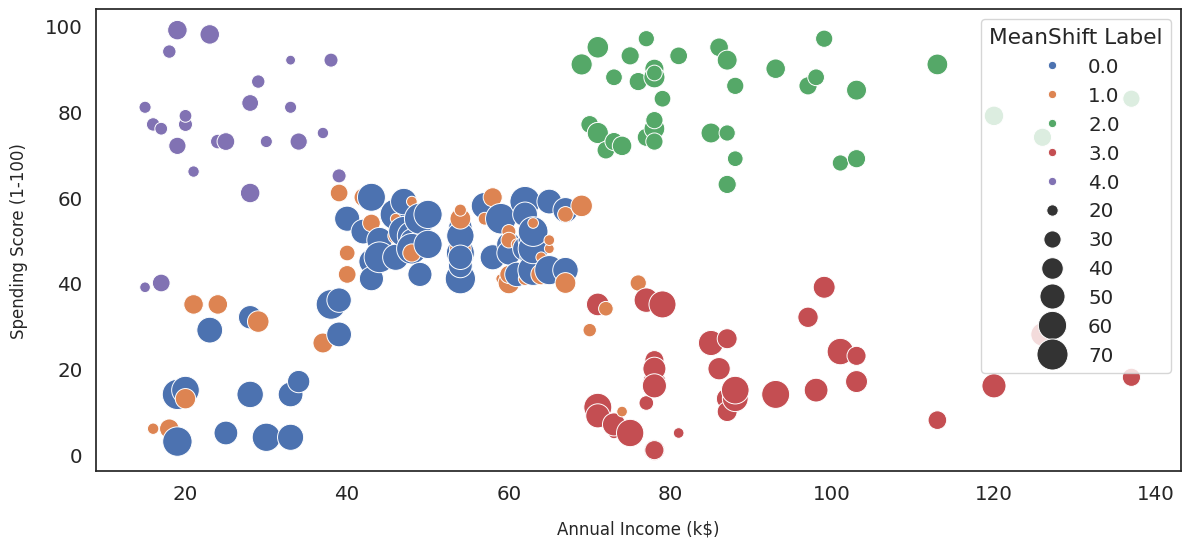

In [46]:
# plotting dataset with cluster information:

plt.figure(figsize=(14, 6))
sns.set(style="white", font_scale=1.3)

# Assuming mshift_result is the output of MeanShift clustering
sns.scatterplot(data=customer_mshift, x='Income', y='Score',
                hue=mshift_result.astype(float), palette='deep', size='Age',
                sizes=(50, 500))

plt.xlabel('Annual Income (k$)', fontsize=12, labelpad=12)
plt.ylabel('Spending Score (1-100)', fontsize=12, labelpad=12)

# Add a legend
plt.legend(title='MeanShift Label')

plt.show()


In [47]:
# mshift_result is the output of MeanShift clustering
print(customer_mshift['MeanShift Label'].value_counts())

customer_mshift_mean = customer_mshift.iloc[:, 1:].groupby(by='MeanShift Label').mean()
customer_mshift_mean


MeanShift Label
0    57
1    46
2    39
3    34
4    24
Name: count, dtype: int64


,Age,Income,Score
MeanShift Label,,,
0,55.543860,47.947368,41.894737
1,27.891304,52.000000,44.108696
2,32.692308,86.538462,82.128205
3,42.352941,88.647059,17.500000
4,25.250000,24.916667,76.041667


## 7. Results:

In [48]:


# Assuming X_scaled is your data
kmeans_sil_score = silhouette_score(customer_kmeans.iloc[:, 1:], customer_kmeans['K-Means Label'])
dbscan_sil_score = silhouette_score(X_scaled, dbscan_result)
mshift_sil_score = silhouette_score(X_scaled, mshift_result)

df_sil_score = pd.DataFrame({'Silhouette Score': [kmeans_sil_score, 
                                                  dbscan_sil_score, 
                                                  mshift_sil_score]},
                            index=['K-Means', 'DBSCAN', 'MeanShift'])

df_sil_score['Silhouette Score'] = df_sil_score['Silhouette Score'].round(decimals=3)
df_sil_score


,Silhouette Score
K-Means,0.418
DBSCAN,0.257
MeanShift,0.406


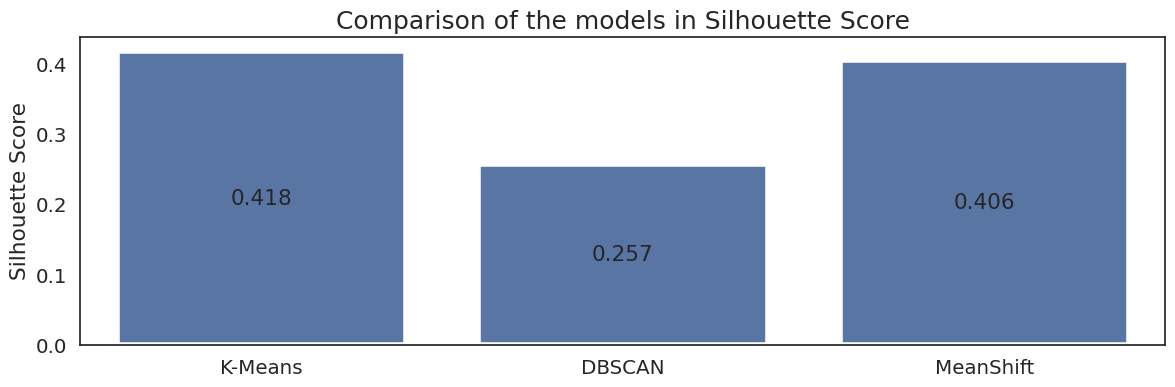

In [49]:
# Plotting the resluts of all 3 models:

plt.figure(figsize=(14, 4))
sns.set_style('white')

plt.title('Comparison of the models in Silhouette Score', fontsize=18)

ax = sns.barplot(data=df_sil_score, x=df_sil_score.index,
                 y=df_sil_score['Silhouette Score'], linewidth=4,)

ax.bar_label(ax.containers[0], label_type='center')

# Remove x-axis label
ax.set(xlabel=None)

plt.show()

## 8. Conclusion

```Based on the Silhouette Score, the K-Means model had the best performance. In addition, in the K-Means algorithm, it is much easier to find the number of clusters.```

In [50]:
customer_kmeans.columns

Index(['Gender', 'Age', 'Income', 'Score', 'K-Means Label'], dtype='object')

<Figure size 1400x800 with 0 Axes>

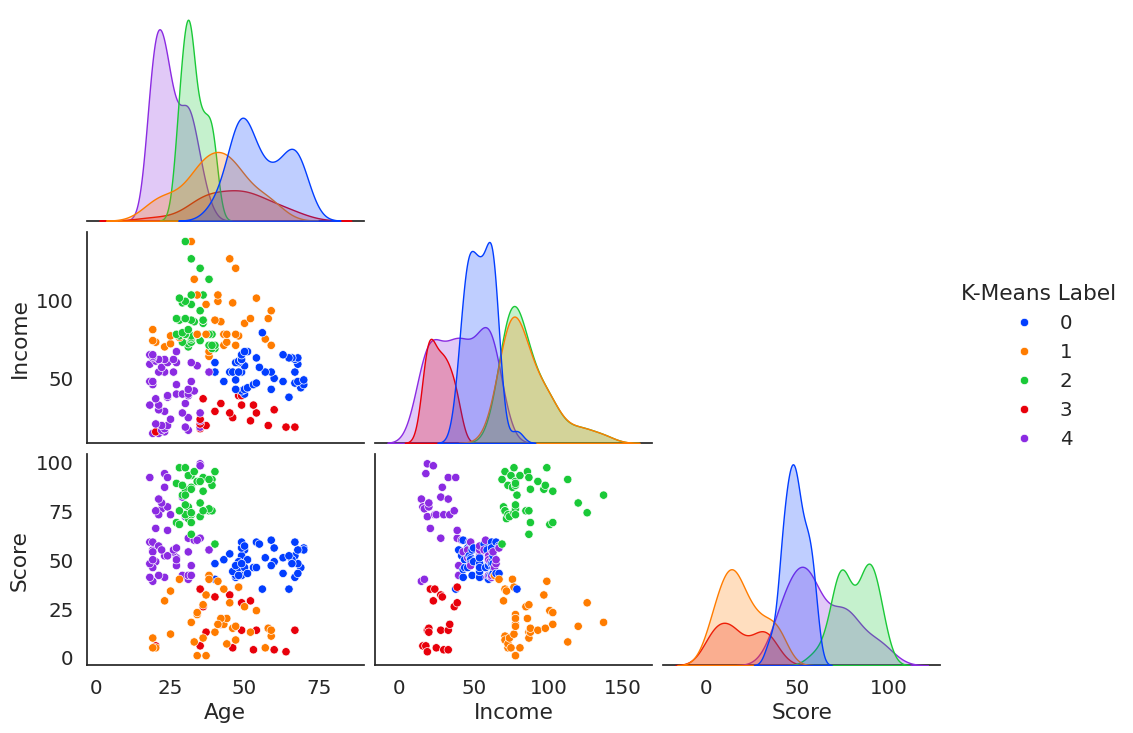

In [51]:
plt.figure(figsize=(14, 8))
sns.set_style('white')

# Assuming customer_kmeans is your dataframe
sns.pairplot(data=customer_kmeans,
             vars=['Age', 'Income', 'Score'],
             hue='K-Means Label',
             corner=True,
             palette='bright',
             aspect=1.3)

plt.show()

In [52]:
customer_kmeans_mean = customer_kmeans.iloc[:, 1:].groupby(by = 'K-Means Label').mean()

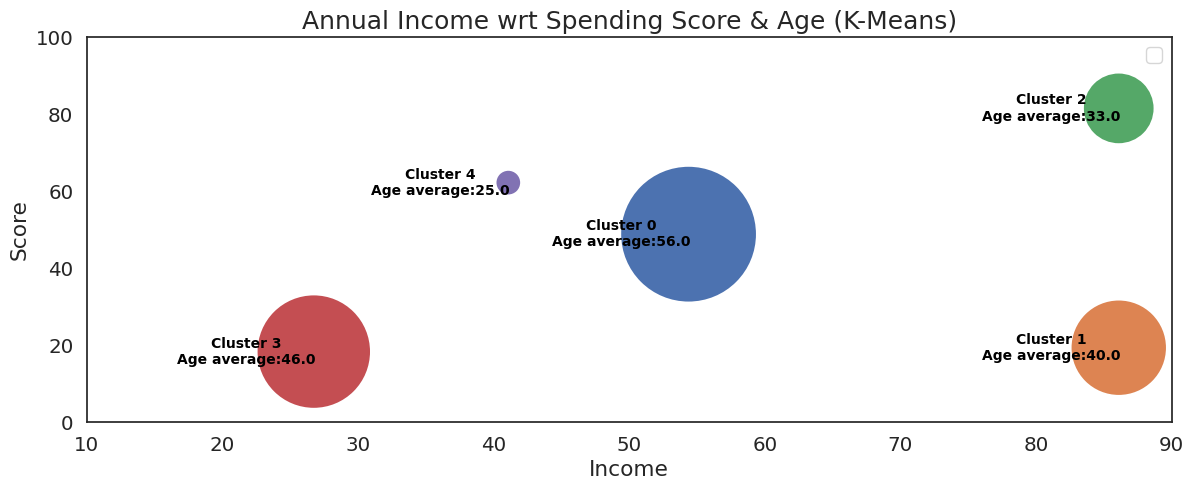

In [53]:
# Plot final conclusions:

plt.figure(figsize=(14, 5))
sns.set(style="white", font_scale=1.3)

for i in range(5):
    plt.text(customer_kmeans_mean['Income'][i] - 5,
             customer_kmeans_mean['Score'][i],
             s="Cluster " + str(i) + "\nAge average:" + str(round(customer_kmeans_mean['Age'][i], 0)),
             color='black',
             weight='semibold',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize = 10
             )

sns.scatterplot(data=customer_kmeans_mean,
                x='Income',
                y='Score',
                hue=customer_kmeans_mean.index,
                palette='deep',
                size='Age',
                sizes=(400, 10000)
                )

plt.title("Annual Income wrt Spending Score & Age (K-Means)", size=18)
plt.xlim(10, 90)
plt.ylim(0, 100)
plt.legend([])

plt.show()


**Based on the K-Means algorithm, 5 clusteres were identified:**
- **Label 0:** People with high annual incomes but low spending scores.
- **Label 1:** Older people with average annual incomes and average spending scores.
- **Label 2:** Young people with low annual incomes but high spending scores.
- **Label 3:** Middle-aged people with low annual incomes and low spending scores.
- **Label 4:** Young people with high annual incomes but high spending scores.